# IFT6758 – Visualisations avancées (plans de tir NHL)

Ce notebook génère des **plans de tir interactifs** par équipe et saison, exporte des **HTML**,
et produit des rendus **Matplotlib** superposés à la **patinoire**.

**Prérequis dans votre dépôt :**
- `ift6758/visualizations/graphiques/graphiques_util_advanced.py`
- `ift6758/visualizations/debogage_interactif/patinoire.py`
- Dossier `ressources/` avec les JSON du jeu de données.

In [60]:

from pathlib import Path
import os, sys, importlib

# Assurer l'importation des packages
PROJECT_ROOT = r"D:\Bureau\project-datascience-python" # À modifier selon votre configuration
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

import ift6758.visualizations.graphiques.graphiques_util_advanced as g
importlib.reload(g) 

DEST = r"D:\Bureau\project-datascience-python\ressources" # À modifier selon votre configuration
OUT  = r"D:\Bureau\project-datascience-python\figures" # À modifier selon votre configuration
# Création du répertoire de sortie s'il n'existe pas
Path(OUT).mkdir(parents=True, exist_ok=True)

# Visual tuning
NX, NY, SIGMA = 80, 54, 1.6


## 1) Aperçu interactif Plotly (une saison)

In [ ]:

# Display 2017-18 figure sans contour
fig, teams = g.make_season_figure_enhanced(
    "20172018", DEST, nx=NX, ny=NY, sigma=SIGMA, show_rink=True, rink_opacity=0.95, use_contour= False
)
fig.show()

In [63]:

# Display 2017-18 figure avec contour
fig, teams = g.make_season_figure_enhanced(
    "20172018", DEST, nx=NX, ny=NY, sigma=SIGMA, show_rink=True, rink_opacity=0.95, use_contour= True
)
fig.show()

Rouge = au-dessus de la moyenne, Bleu = en-dessous.

Les zones rouges dans l’enclave/slot indiquent une équipe qui génère plus de tirs dangereux près du filet; du bleu autour du slot suggère une attaque peu menaçante.

Des amas rouges aux points traduisent un jeu axé sur les lancers des défenseurs; des poches rouges en entrée de zone indiquent des tirs en transition.

La forme des zones révèle la structure tactique : jeu derrière le but (rouge derrière la cage), passes transversales fréquentes (rouge des deux côtés du bas de l’enclave), ou tirs périphériques (rouge loin du centre).

Comparer une équipe à la ligue met en évidence ses forces/faiblesses relatives plutôt que le volume brut : une équipe peut tirer moins mais mieux (rouge concentré près du filet).

D’une saison à l’autre, l’évolution des motifs (rouge→bleu ou inversement) reflète des changements d’effectif, de système ou de santé des joueurs clés.

À garder en tête : ces cartes ignorent la situation de jeu et la qualité des adversaires; elles orientent l’analyse, mais ne suffisent pas, seules, à expliquer la performance globale.



## 3) Discussion sur l'équipe l'Avalanche du Colorado pour ses saisons 2016-17 et 2020-21

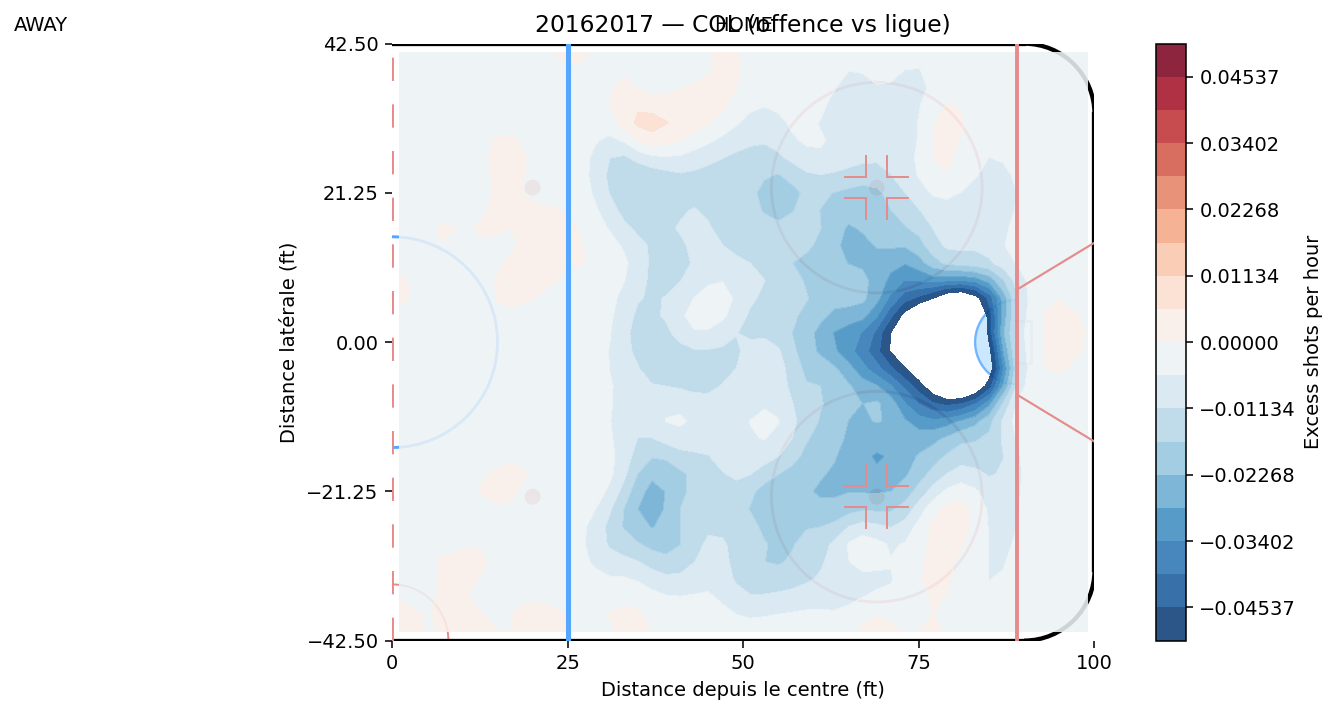

In [71]:

# Display 2016-17 figure avec contour pour l'Avalanche du Colorado
g.save_team_map_png("20162017", DEST, team_abbr="COL",
                    out_png=os.path.join(OUT, "20162017_COL_offence_map.png"),
                    use_contour=True)

from IPython.display import Image, display

png_path = os.path.join(OUT, "20162017_COL_offence_map.png")
display(Image(filename=png_path))

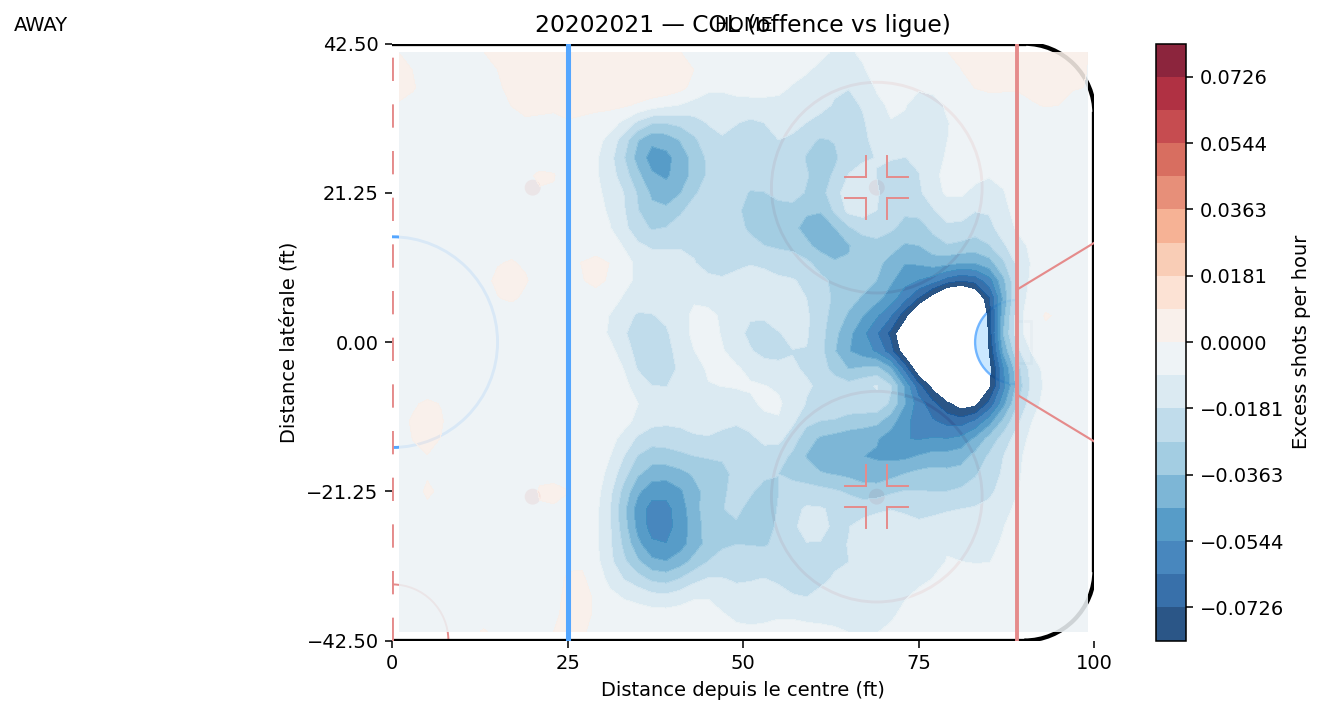

In [73]:

# Display 2020-21 figure avec contour pour l'Avalanche du Colorado
g.save_team_map_png("20202021", DEST, team_abbr="COL",
                    out_png=os.path.join(OUT, "20202021_COL_offence_map.png"),
                    use_contour=True)


png_path = os.path.join(OUT, "20202021_COL_offence_map.png")
display(Image(filename=png_path))

Comparaison Avalanche du Colorado — 2016-17 vs 2020-21
Volume & localisation des tirs

2016-17 : la carte montre surtout du bleu dans l’enclave/slot et devant le filet → moins de tirs que la moyenne ligue aux endroits les plus dangereux. Les excès (légers rouges) apparaissent plutôt loin du but (points/extérieur), signe d’une attaque peu menaçante.

2020-21 : large plaque rouge dans le bas du slot et autour du cercle droit, indiquant bien plus de tirs que la moyenne en zone à haute dangerosité. On voit aussi un apport positif depuis la droite du point (activation des défenseurs) mais centré autour du filet.

Interprétation tactique

2016-17 : attaques périmétriques, peu de présence filet, difficultés à entrer au cœur de la glace → profils de tirs facilement neutralisables.

2020-21 : accès régulier au centre et au second poteau, meilleure récupération/rebonds et circulation depuis le côté droit (cohérent avec les menaces MacKinnon–Rantanen).

Cohérence avec le classement

2016-17 : saison historiquement difficile (dernier de la LNH) → la sous-production à 5v5 dans les zones dangereuses est exactement ce que montre la carte.

2020-21 : saison d’élite (Trophée des Présidents) → la dominance nette dans le slot et en entrée de zone offensive est visible et attendue.

Remarques

Les cartes reposent sur des tirs non bloqués et lissés, à forces égales approximées (on ignore les A.N./D.N. ici) : l’écart visuel reste néanmoins très parlant sur l’évolution du danger créé à 5v5 entre les deux saisons.



## 3) Exports HTML pour 2016–17 → 2020–21

In [64]:

# Export seasons
seasons = ["20162017","20172018","20182019","20192020","20202021"]
for s in seasons:
    fig, _ = g.make_season_figure_enhanced(s, DEST, nx=NX, ny=NY, sigma=SIGMA, show_rink=True, rink_opacity=0.95, use_contour= True)
    out = os.path.join(OUT, f"{s}_offence_map.html")
    g.write_html(fig, out)
    print("wrote:", out)


wrote: D:\Bureau\project-datascience-python\figures\20162017_offence_map.html
wrote: D:\Bureau\project-datascience-python\figures\20172018_offence_map.html
wrote: D:\Bureau\project-datascience-python\figures\20182019_offence_map.html
wrote: D:\Bureau\project-datascience-python\figures\20192020_offence_map.html
wrote: D:\Bureau\project-datascience-python\figures\20202021_offence_map.html


## 4) Compairaison des plans de tirs des équipes Sabres de Buffalo et Lightning de Tamba Bay pour les saisons 2018-19, 2019-20 et 2020-21

BUF — 20182019


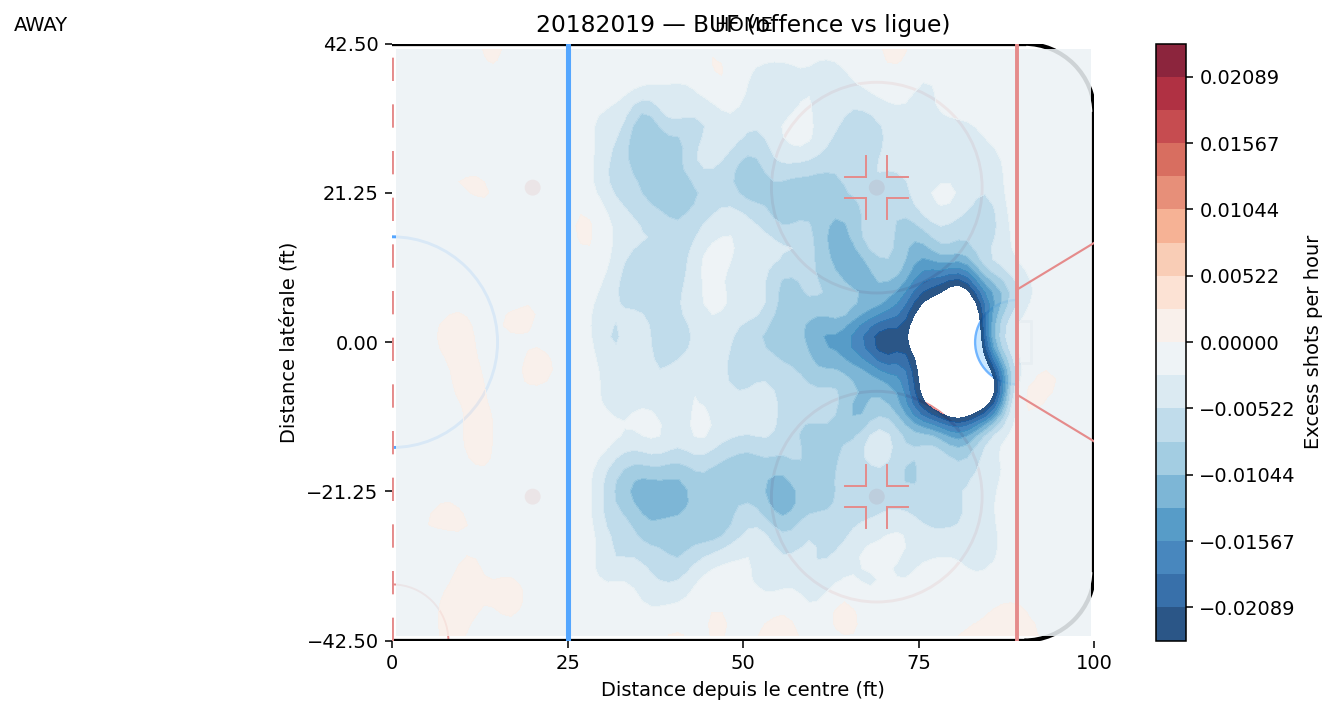

TBL — 20182019


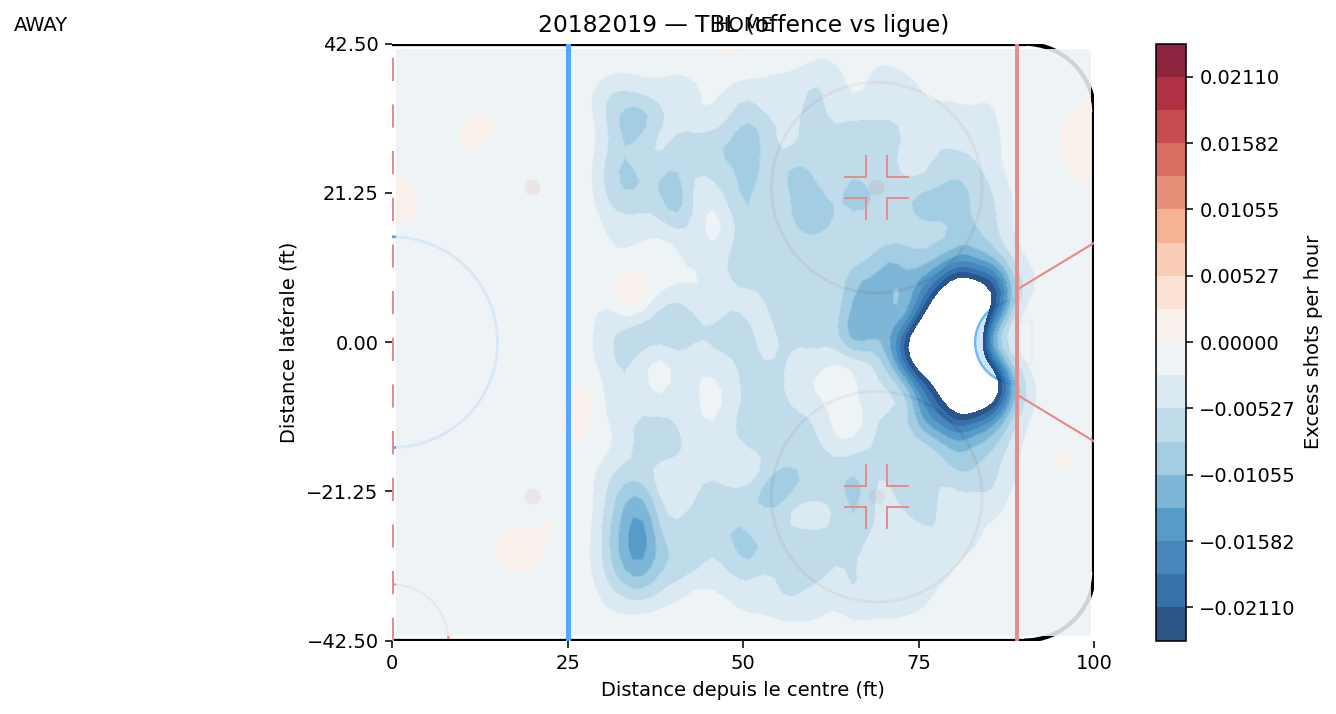

BUF — 20192020


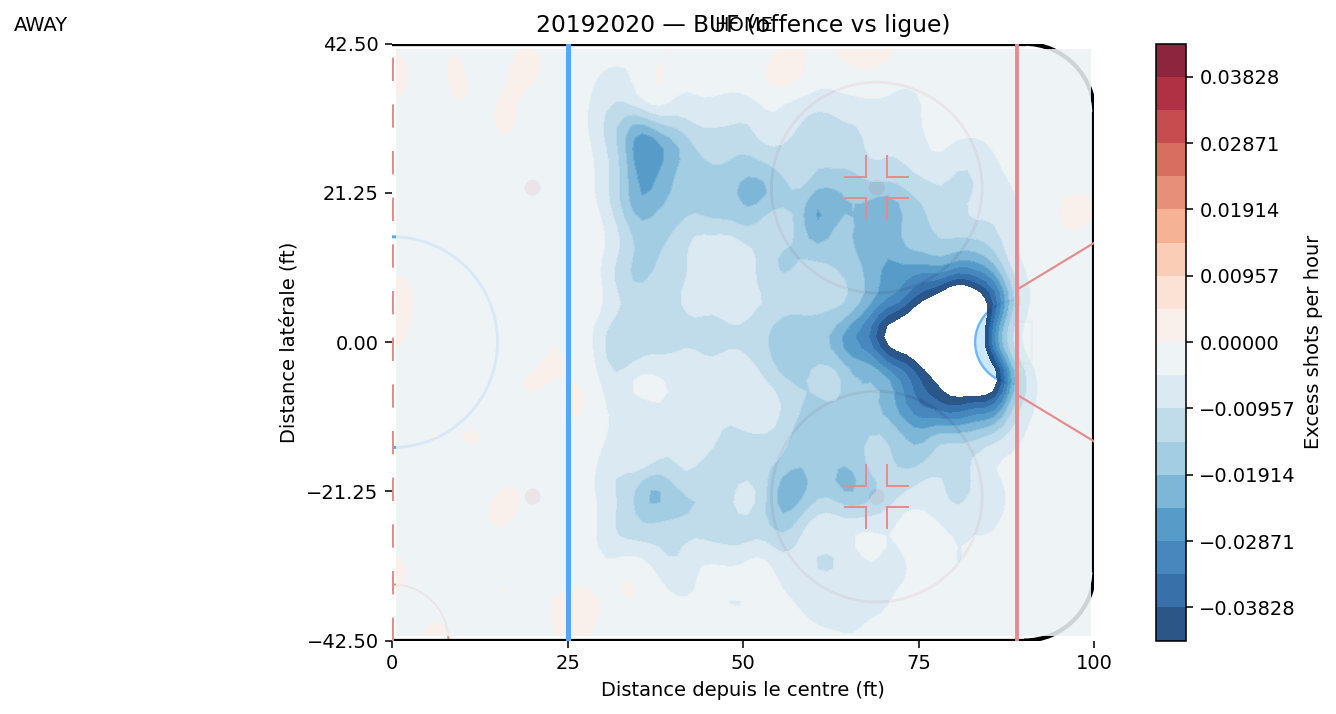

TBL — 20192020


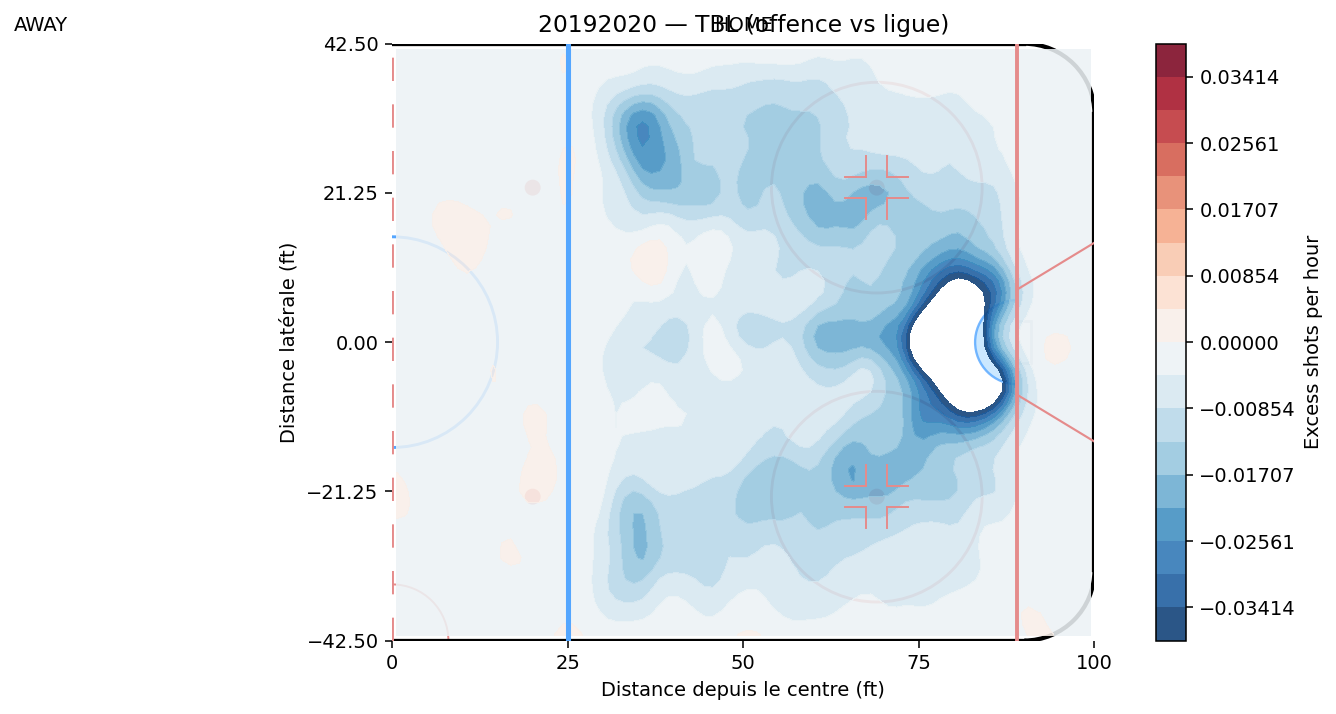

BUF — 20202021


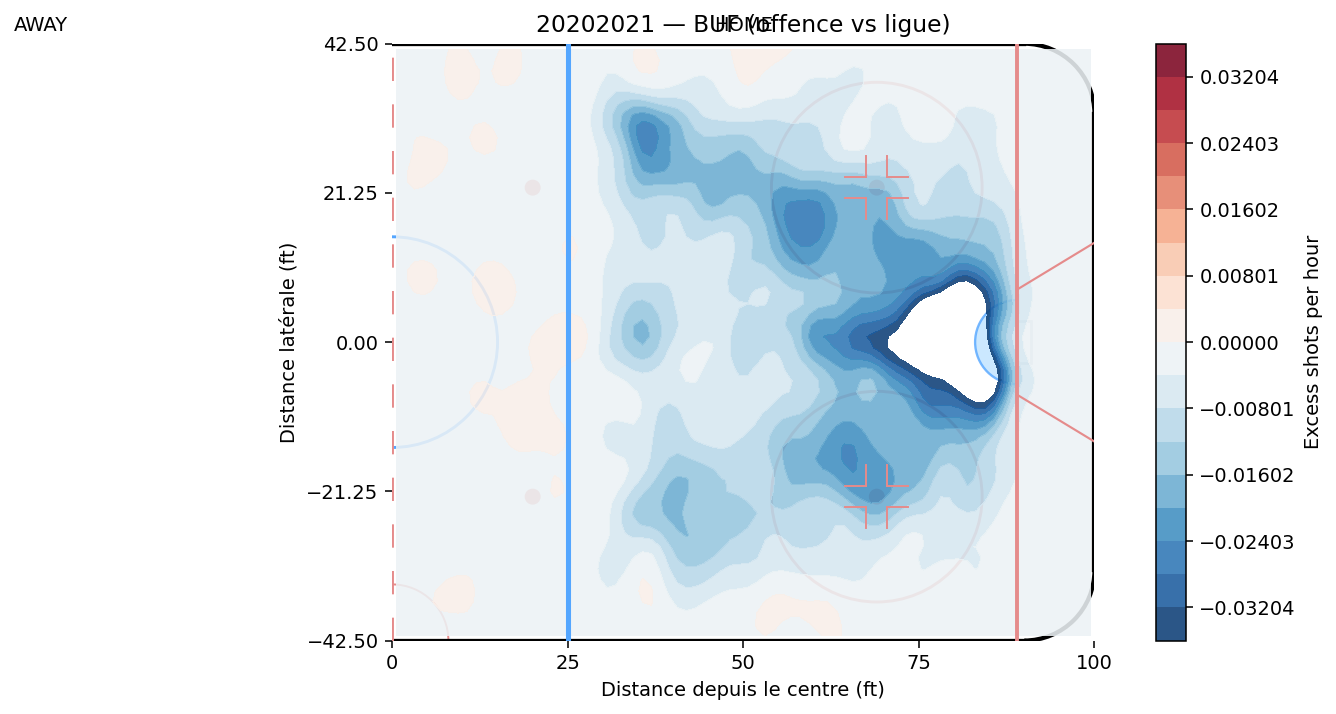

TBL — 20202021


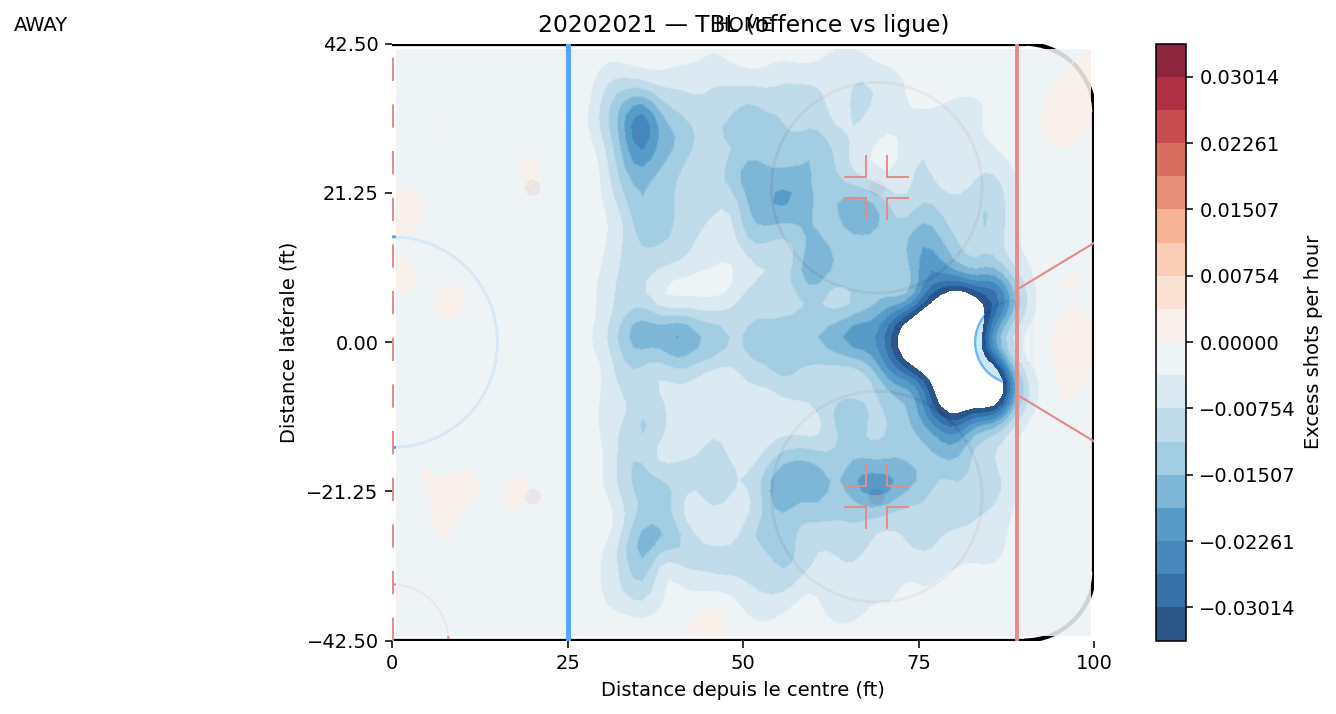

In [75]:
seasons = ["20182019", "20192020", "20202021"]
teams   = ["BUF", "TBL"]  # Sabres / Lightning

png_paths = []

# --- Génération des PNG pour chaque équipe x saison ---
for s in seasons:
    for team in teams:
        fname = f"{s}_{team}_offence_map.png"
        out_png = os.path.join(OUT, fname)
        g.save_team_map_png(
            s, DEST, team_abbr=team, out_png=out_png,
            nx=NX, ny=NY, sigma=SIGMA,
            cmap="icefire",       
            use_contour=True,                
        )
        png_paths.append((s, team, out_png))

# --- Affichage des PNG générés ---
for s, team, path in png_paths:
    print(f"{team} — {s}")
    display(Image(filename=path))

